In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
from dateutil.relativedelta import relativedelta

# Number of Students in Public Education

Data Source: [Sama Statistical Report](https://www.sama.gov.sa/ar-sa/EconomicReports/Pages/report.aspx?cid=127)

Description:

## Inspect

In [2]:
# Read data
df = pd.read_csv("data/SAMA_StatisticalReport_2021.csv", header=[0,1])
df.head()

Unnamed: 0_level_0    متوسط                      إبتدائي            \
              الفترة    ذكور     إناث   المجموع      ذكور      إناث    
0          1389/1390  55890.0   5305.0   61195.0  277364.0  119789.0   
1          1390/1391  60926.0   8645.0   69571.0  295520.0  132277.0   
2          1391/1392  70802.0  13546.0   84348.0  321043.0  153964.0   
3          1392/1393  78924.0  20518.0   99442.0  346928.0  174194.0   
4          1393/1394  86247.0  29478.0  115725.0  380286.0  197448.0   

               ثانوي                                      
   المجموع     ذكور    إناث  المجموع  إجمالي عدد الطلبة   
0  397153.0  14058.0  1487.0  15545.0           473893.0  
1  427797.0  18178.0  1856.0  20034.0           517402.0  
2  475007.0  20440.0  2979.0  23419.0           582774.0  
3  521122.0  23242.0  4009.0  27251.0           647815.0  
4  577734.0  26774.0  6412.0  33186.0           726645.0

## Clean the Data

### Set Index

In [3]:
def clean(df):
    df = df.drop(51)
    df.drop(df.columns[0],axis=1,inplace=True)
    df.rename(columns={"الفترة":"year"}, inplace=True)
    df["year"] = pd.date_range(start='1970',end='2021', freq='Y')
    df.set_index('year', inplace=True)
    return df

In [4]:
df = clean(df)
df.head()

متوسط                      إبتدائي                        ثانوي  \
              ذكور     إناث   المجموع      ذكور      إناث   المجموع     ذكور    
year                                                                            
1970-12-31  55890.0   5305.0   61195.0  277364.0  119789.0  397153.0  14058.0   
1971-12-31  60926.0   8645.0   69571.0  295520.0  132277.0  427797.0  18178.0   
1972-12-31  70802.0  13546.0   84348.0  321043.0  153964.0  475007.0  20440.0   
1973-12-31  78924.0  20518.0   99442.0  346928.0  174194.0  521122.0  23242.0   
1974-12-31  86247.0  29478.0  115725.0  380286.0  197448.0  577734.0  26774.0   

                                                
             إناث  المجموع  إجمالي عدد الطلبة   
year                                            
1970-12-31  1487.0  15545.0           473893.0  
1971-12-31  1856.0  20034.0           517402.0  
1972-12-31  2979.0  23419.0           582774.0  
1973-12-31  4009.0  27251.0           647815.0  
1974-12-31  6412.0  33186.0           726645.0

<AxesSubplot:xlabel='year'>

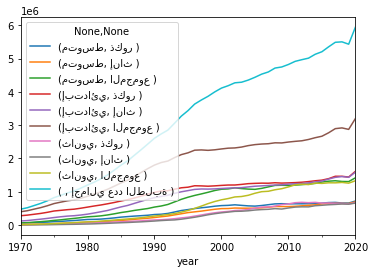

In [6]:
df.plot()

### Rename Columns

In [8]:
def rename_indicies(df):
    a_to_e = {
    "متوسط": "middle",
    "إبتدائي": "primary",
    "ثانوي": "high"
    }

    df.rename(columns=a_to_e,level=0, inplace=True)

    sub_df_1 = df["primary"]
    sub_df_2 = df["middle"]
    sub_df_3 = df["high"]

    sub_df_1 = sub_df_1.reset_index()
    sub_df_2 = sub_df_2.reset_index()
    sub_df_3 = sub_df_3.reset_index()

    # rename headers
    # "m_primary", "m_middle", "m_high"

    a_to_e = {
         'ذكور ': "primary_males",
        'إناث ':"primary_females",
        'المجموع ': "primary_total"
    }

    sub_df_1.rename(columns=a_to_e, inplace=True)
    a_to_e = {
         'ذكور ': "middle_males",
        'إناث ':"middle_females",
        'المجموع ': "middle_total"
    }

    sub_df_2.rename(columns=a_to_e, inplace=True)
    sub_df_2.drop(columns=['year'],inplace=True)
    a_to_e = {
         'ذكور ': "high_males",
        'إناث ':"high_females",
        'المجموع ': "high_total"
    }
    sub_df_3.rename(columns=a_to_e, inplace=True)
    sub_df_3.drop(columns=['year'],inplace=True)

    cleaned_df = pd.concat([sub_df_1,sub_df_2,sub_df_3], axis='columns')
    cleaned_df.set_index('year', inplace=True)
    
    return cleaned_df

In [9]:
df = rename_indicies(df)
df.head()

,primary_males,primary_females,primary_total,middle_males,middle_females,middle_total,high_males,high_females,high_total
year,,,,,,,,,
1970-12-31,277364.0,119789.0,397153.0,55890.0,5305.0,61195.0,14058.0,1487.0,15545.0
1971-12-31,295520.0,132277.0,427797.0,60926.0,8645.0,69571.0,18178.0,1856.0,20034.0
1972-12-31,321043.0,153964.0,475007.0,70802.0,13546.0,84348.0,20440.0,2979.0,23419.0
1973-12-31,346928.0,174194.0,521122.0,78924.0,20518.0,99442.0,23242.0,4009.0,27251.0
1974-12-31,380286.0,197448.0,577734.0,86247.0,29478.0,115725.0,26774.0,6412.0,33186.0


<AxesSubplot:xlabel='year'>

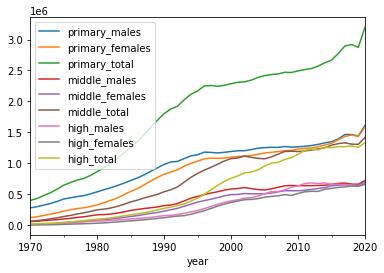

In [10]:
df.plot()

## Seperate Totals

In [11]:
totals = df[['primary_total','middle_total','high_total']]
totals.head()

,primary_total,middle_total,high_total
year,,,
1970-12-31,397153.0,61195.0,15545.0
1971-12-31,427797.0,69571.0,20034.0
1972-12-31,475007.0,84348.0,23419.0
1973-12-31,521122.0,99442.0,27251.0
1974-12-31,577734.0,115725.0,33186.0


<AxesSubplot:xlabel='year'>

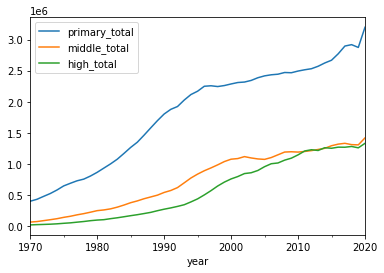

In [12]:
totals.plot()

Data without totals

<AxesSubplot:xlabel='year'>

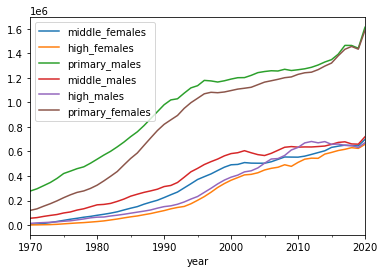

In [13]:
df[list(set(df.columns) - set(totals.columns))].plot()

## Plot The Growth

<font color='green'>Usage no. 1:</font>
User should be able to choose which category (series) to plot.

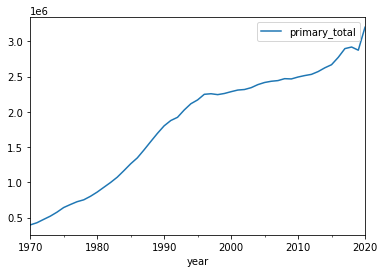

In [213]:
options = ["primary_total"]
totals[options].plot();

# Forecasting

Predict future growth for a category

In [14]:
def fit(col):
    model = pm.auto_arima(col, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    return model
    

In [15]:
options = ["high_total"]
model = fit(totals[options])

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1116.392, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1129.805, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1116.754, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1115.768, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1128.014, Time=0.00 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1119.531, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1113.082, Time=0.06 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1115.184, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1113.181, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1126.603, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1118.287, Time=0.03 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1110.462, Time=0.10 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=1102.088, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,3)(0,0,0)[0]             : 

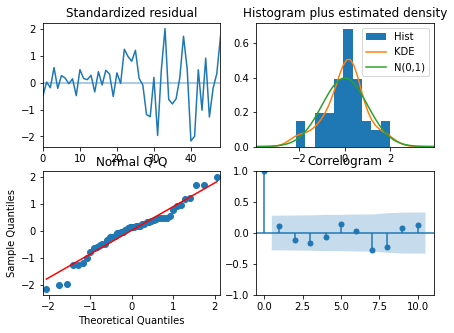

In [16]:
model.plot_diagnostics(figsize=(7,5));

In [17]:
def forecast(df,choice, model, n_periods, title):
    # Forecast
    # INPUT
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1], df.index[-1] + relativedelta(years=n_periods-1), freq='Y')

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(df[choice])
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title(title)
    plt.show()

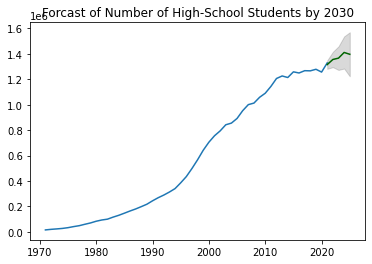

In [18]:
forecast(df=df,
         choice="high_total", 
         model=model,
         n_periods=5,
         title="Forcast of Number of High-School Students by 2030")

<font color='green'>Usage no. 2:</font>
User should be able to choose a **category** (series) to forecast.
  - Training a model
  - Plotting the forcast

<font color='green'>Usage no. 3:</font>
User should be able to choose the **number of years** to forecast.

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1116.392, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1129.805, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1116.754, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1115.768, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1128.014, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1119.531, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1113.082, Time=0.12 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1115.184, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1113.181, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1126.603, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1118.287, Time=0.05 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1110.462, Time=0.17 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=1102.088, Time=0.22 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,2,3)(0,0,0)[0]             : 

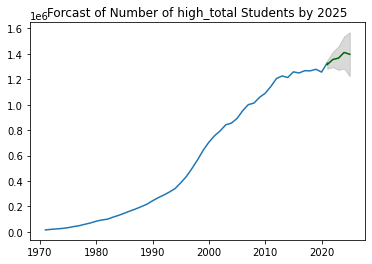

In [20]:
# User Inputs:
option="high_total"
years = 5

# Train:
model = fit(df[option])

# Predict :
forecast(df=df,
         choice=option, 
         model=model,
         n_periods=years,
         title=f"Forcast of Number of {option} Students by {2020+years}")